# CODIGOS DE ECUACIONES DIFERENCIALES

In [29]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random as ra
import itertools
%matplotlib inline

# PROECTO DE ECUACIONES DIFERENCIALES
## ODEINT


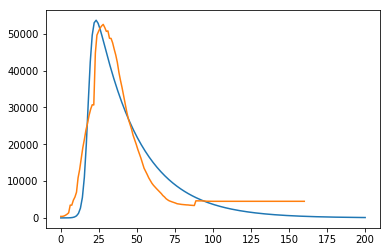

In [30]:
#Proyecto de progrgmación de ecuaciones diferenciales
# Total population, N.
N = 68350
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.65, 1/28
# A grid of time points (in days)
t = np.linspace(0, 200, 156)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
# Plot the data on three separate curves for S(t), I(t) and R(t)


plt.figure(2)
plt.plot(t,I)
plt.plot(t_,I_)    
    
plt.show()



In [31]:
ig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

<Figure size 432x288 with 0 Axes>

## Metodo de euler

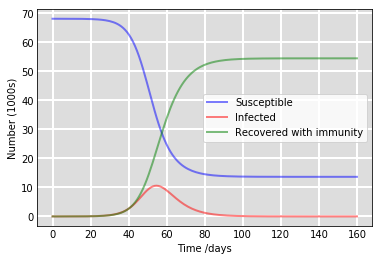

In [32]:
"Metodo de euler"
Beta=0.2;Gamma=1/10
# Total population, N.
N = 68135
# Initial number of infected and recovered individuals, I0 and R0.
I0=1; R0 =0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
y0=[R0,S0,I0]
xf=156;x0=0

def deriv(t,R,S,I):
    dS_dt= -Beta*I*S/N
    dI_dt= Beta*I*S/N - Gamma*I
    dR_dt= Gamma*I
    return np.array([dR_dt,dS_dt,dI_dt])
    
    

def Runge_kutta(x,xf,y0,n,f,v):
    h=(xf-x)/n
    y=y0
    k=np.zeros((4,len(y0)))
    for i in range(len(y0)):
        if i==0:
            k[0][0]=h*f(x,y[0],y[1],y[2])[0]
            k[0][1]=h*f(x,y[0],y[1],y[2])[1]
            k[0][2]=h*f(x,y[0],y[1],y[2])[2]
            
        elif "euler"!=v : 
            k[1][i]=f(x+h*0.5,y[0]+h*0.5*k[0][i],y[1]+h*0.5*k[1][i],y[2]+h*0.5*k[2][i])[0]
            k[2][i]=f(x+h*0.5,y[0]+h*0.5*k[0][i],y[1]+h*0.5*k[1][i],y[2]+h*0.5*k[2][i])[1]
            k[3][i]=f(x+h,y[0]+h*k[0][i],y[1]+h*k[1][i],y[2]+h*k[2][i])[2]

    for i in range(len(y0)):
        y[i]=y[i]+(k[0][i]+2*k[1][i]+2*k[2][i]+k[3][i])/6
    return np.array([y[0],y[1],y[2]])

e="euler"
r="runge"
Datos_Re=[];Datos_Se=[];Datos_Ie=[];n=50
for i in range(156):
    Datos_Re.append((Runge_kutta(x0,xf,y0,n,deriv,e)[0])/1000)
    Datos_Se.append((Runge_kutta(x0,xf,y0,n,deriv,e)[1])/1000)
    Datos_Ie.append((Runge_kutta(x0,xf,y0,n,deriv,e)[2])/1000)
    y0=Runge_kutta(0,160,y0,n,deriv,e)
TT=np.linspace(0,160,156)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(TT, Datos_Se, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(TT, Datos_Ie, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(TT, Datos_Re, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend()

## Metodo Runge

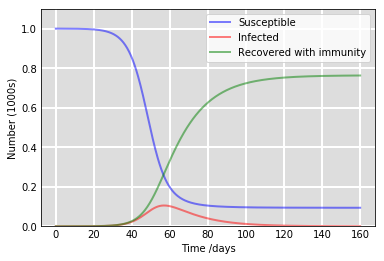

In [34]:
"Metodo de Runge"


# Total population, N.
N = 68135;Beta=0.2;Gamma=0.05
# Initial number of infected and recovered individuals, I0 and R0.
I0=1; R0 =0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
y0=[R0,S0,I0]
xf=160;x0=0;m=500

Datos_R=[];Datos_S=[];Datos_I=[];n=80
for i in range(m):
    Datos_R.append((Runge_kutta(x0,xf,y0,n,deriv,r)[0])/N)
    Datos_S.append((Runge_kutta(x0,xf,y0,n,deriv,r)[1])/N)
    Datos_I.append((Runge_kutta(x0,xf,y0,n,deriv,r)[2])/N)
    y0=Runge_kutta(x0,xf,y0,n,deriv,r)
TT=np.linspace(x0,xf,m)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(TT, Datos_S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(TT, Datos_I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(TT, Datos_R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend()

# Super ajuste HKM

156
156
156


ValueError: x and y must have same first dimension, but have shapes (156,) and (500,)

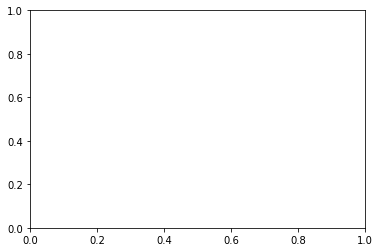

In [7]:
with open('deaths.txt', 'r') as data: 
    data = [i.split(",") for i in data]
confirmed=[];deaths=[];recovered=[]
for elemento in data:
    elemento[0]=float(elemento[0])
    deaths.append(elemento[0])
print(len(data))    
with open('confirmed.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    recovered.append(elemento[0])
print(len(data))
    
with open('recovered.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    confirmed.append(elemento[0])

print(len(data))    
NN=68135
C_=np.array(confirmed);R_=np.array(recovered);D_=np.array(deaths)
I_=abs(C_-R_)
S1=abs(NN-C_-D_)
S_=abs(NN-C_)
t_=np.linspace(0,160,len(recovered))
plt.figure(2)
#plt.plot(t_,S1)
#plt.plot(t_,S_)
plt.plot(t_,I)
plt.plot(t_,I_)
#plt.plot(t_,R_)

In [ ]:
#Función de ajuste
#Infectados
I_=abs(C_-R_)
#Funcion a ajustar
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
#Constantes inciales del metodo
#x0=0;xf=160;y0=0;n=40

t = np.linspace(0, 160, 156)
# Total population, N.
N = 68135
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1,0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
y0=S0,I0,R0
def Chisquare(Datos_t,Datos_x,m,I1,I2): 
    #Constantes del sistema
    N=len(Datos_t)
    #Limites de los valores en los cuales vamos a buscar las constantes
    a=I1[0];b=I1[1];c=I2[0];d=I2[1]
    resul=[];k=[];tt=0
    minimo=10000000
    tt1=0
    while  tt1<m:
        beta=ra.uniform(a,b)
        tt2=0
        
        while  tt2<m:
           
            suma=0  
            gamma=ra.uniform(c,d)

            for i in range(N):
                ret = odeint(deriv, y0, t, args=(N, beta, gamma))
                S, I, R = ret.T
                suma+=((Datos_x[i]-I[i])**2)/I[i]
            resul.append(suma)
            for i in range(len(resul)):
                if  minimo>abs(resul[i]):
                    k=[beta,gamma]
                    minimo=resul[i]
                   
                
            
            tt2+=1
        tt1+=1

    #rint(k,minimo)
    fig = plt.figure(1)
    plt.plot(t, I, 'r', label='Infected modelo')
    plt.plot(t, Datos_x, 'r', label='Infected real')
    plt.xlabel('Time /days')
    plt.ylabel('Number (1000s)')
    plt.legend
    plt.plot()
    plt.show()
    return k
I_1=[0.5,0.8];I_2=[0,1/30]
Chisquare(t_,I_,15,I_1,I_2)

In [8]:
def deriv(t,R,S,I):
    dS_dt= -Beta*I*S/N
    dI_dt= Beta*I*S/N - Gamma*I
    dR_dt= Gamma*I
    return np.array([dR_dt,dS_dt,dI_dt])
gamma=ra.uniform(0,1)
gamma

0.6663877886816536

**Comparación de los métodos**

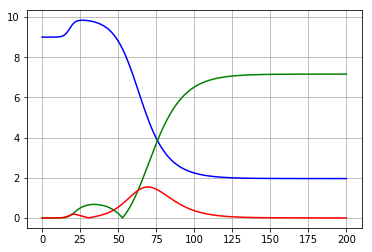

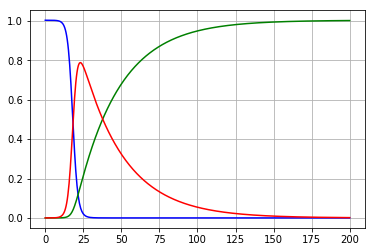

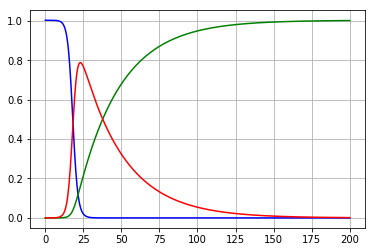

In [9]:
# Relative error Euler and Runge kutta

ES = np.abs([m - n for m,n in zip(Datos_S,Datos_Se)])
EI = np.abs([m - n for m,n in zip(Datos_I,Datos_Ie)])
ER = np.abs([m - n for m,n in zip(Datos_R,Datos_Re)])

plt.plot(t,ES,'b')
plt.plot(t,ER,'g')
plt.plot(t,EI,'r')
plt.grid()
plt.show()

# Relative error Euler and Odeint

ES1 = np.abs((Datos_S-ret[:, 0]))
EI1 = np.abs((Datos_I-ret[:, 1]))
ER1 = np.abs((Datos_R-ret[:, 2]))

plt.plot(t,ES1/N,'b')
plt.plot(t,ER1/N,'g')
plt.plot(t,EI1/N,'r')
plt.grid()
plt.show()

# Relative error Runge kutta and Odeint

ES2 = np.abs((Datos_Se-ret[:, 0]))
EI2 = np.abs((Datos_Ie-ret[:, 1]))
ER2 = np.abs((Datos_Re-ret[:, 2]))

plt.plot(t,ES2/N,'b')
plt.plot(t,ER2/N,'g')
plt.plot(t,EI2/N,'r')
plt.grid()
plt.show()

#plt.plot(t,Datos_Ie,'o',color='r')
#plt.plot(t,Datos_I,'o',color='black')
#plt.plot(t, ret[:, 1]/N, 'o',color='b')
#plt.xlim(50,51)
#plt.ylim(6.1,6.75)
#plt.grid()
#plt.show()    


**Parámetros del sistema**

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


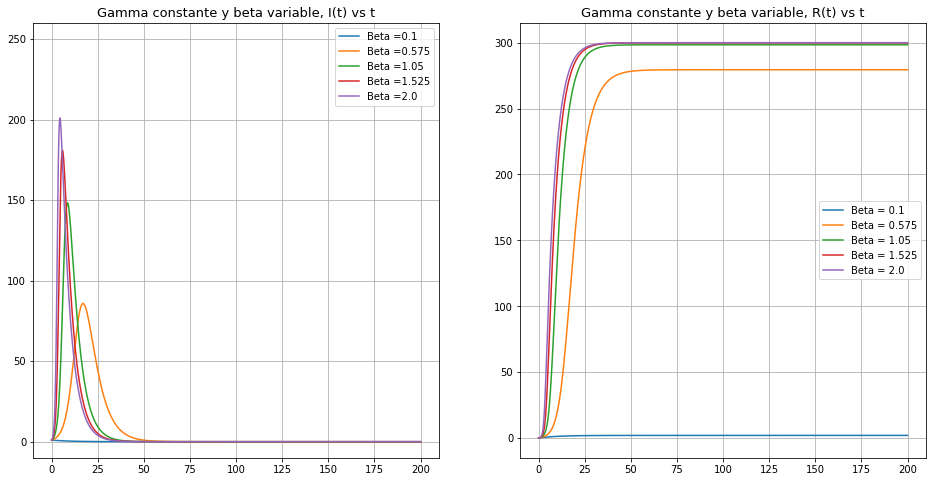

In [10]:
# Parameters
N = 300
beta = 0.3
gama = 0.2
beta1 = np.linspace(0.1,2,5)


# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1, 0] # Initial conditions

t = np.linspace(0, 200, 2000) # Step


plt.figure(figsize=(16,8))
for i in beta1:
    ret = odeint(f, y0, t, args=(N,i,gama)) # Solution
    plt.subplot(121)
    plt.title("Gamma constante y beta variable, I(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 1], label='Beta =%s'%i)
    plt.ylim(-10,260)
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Gamma constante y beta variable, R(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 2], label='Beta = %s'%i)
    plt.legend()
    plt.grid()


plt.show()
    

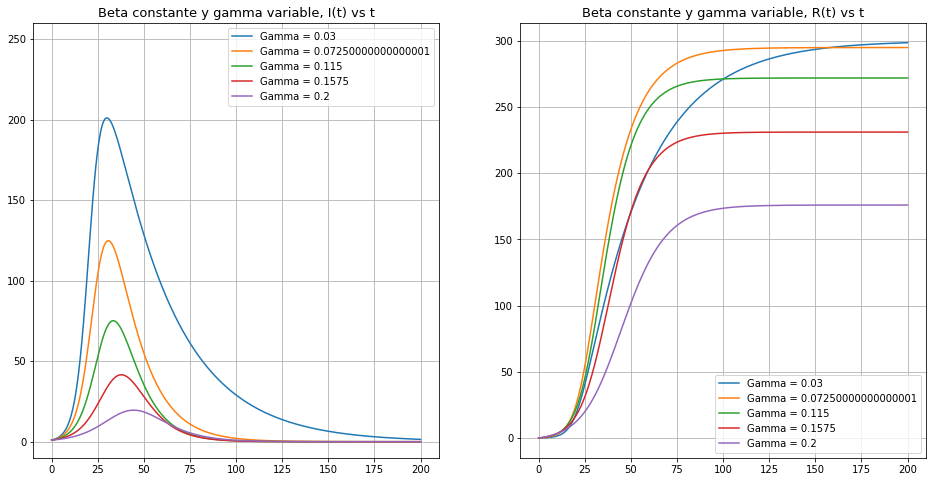

In [11]:
#Analogamente para gama
N=300
gama1 = np.linspace(0.03,0.2,5)

# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1,0] # Initial conditions

t = np.linspace(0, 200, 2000) # Step

plt.figure(figsize=(16,8))
for i in gama1:
    ret = odeint(f, y0, t, args=(N,beta,i)) # Solution
    plt.subplot(121)
    plt.title("Beta constante y gamma variable, I(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 1], label='Gamma = %s'%i)
    plt.ylim(-10,260)
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Beta constante y gamma variable, R(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 2], label='Gamma = %s'%i)
    plt.legend()
    plt.grid()